In [16]:
import math
from jmetal.core.solution import  FloatSolution
from jmetal.core.problem import  FloatProblem

class Schwefel(FloatProblem):

    def __init__(self, number_of_variables: int = 10):
        super(Schwefel, self).__init__()
        self.number_of_objectives = 1
        self.number_of_variables = number_of_variables
        self.number_of_constraints = 0

        self.obj_directions = [self.MINIMIZE]
        self.obj_labels = ['f(x)']

        self.lower_bound = [-500 for _ in range(number_of_variables)]
        self.upper_bound = [500 for _ in range(number_of_variables)]

        FloatSolution.lower_bound = self.lower_bound
        FloatSolution.upper_bound = self.upper_bound

    def evaluate(self, solution: FloatSolution) -> FloatSolution:
        a = 418.9829
        result = a * solution.number_of_variables
        x = solution.variables

        for i in range(solution.number_of_variables):
            result -= x[i] * math.sin(math.sqrt(abs(x[i])))

        solution.objectives[0] = result

        return solution


    def get_name(self) -> str:
        return 'Schwefel'

{'0': <GeneticAlgorithm(Thread-47, initial)>, '1': <GeneticAlgorithm(Thread-48, initial)>, '2': <GeneticAlgorithm(Thread-49, initial)>}


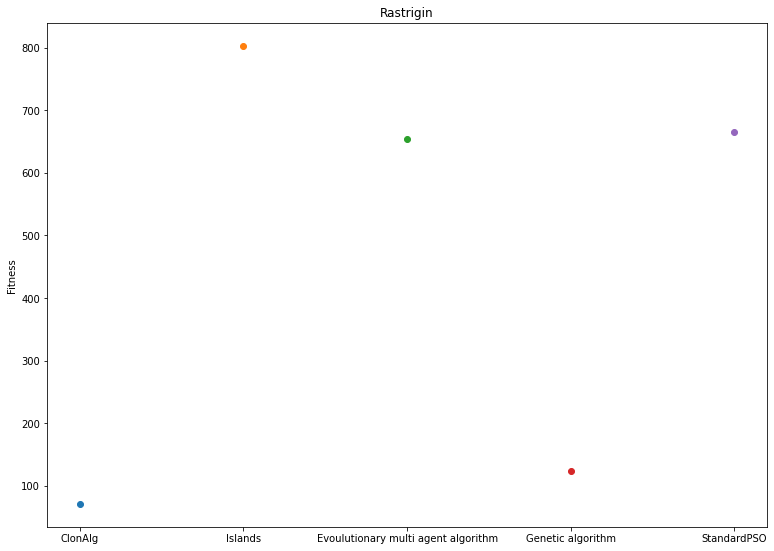

{'0': <GeneticAlgorithm(Thread-54, initial)>, '1': <GeneticAlgorithm(Thread-55, initial)>, '2': <GeneticAlgorithm(Thread-56, initial)>}


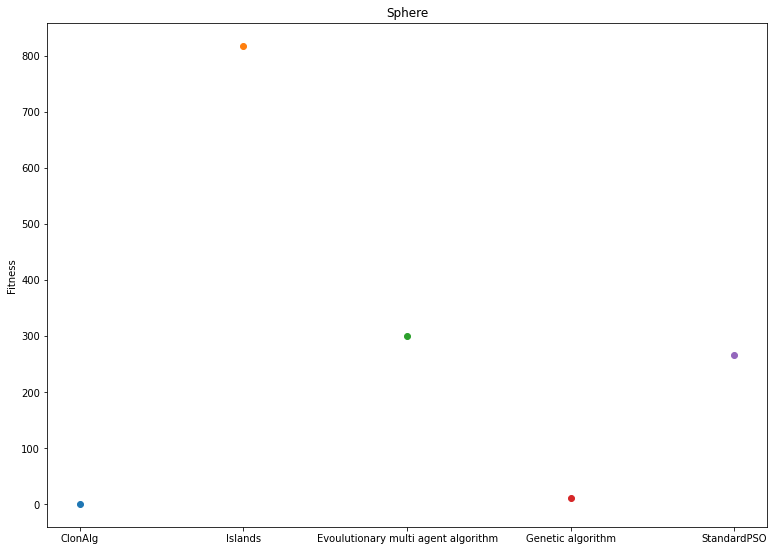

{'0': <GeneticAlgorithm(Thread-61, initial)>, '1': <GeneticAlgorithm(Thread-62, initial)>, '2': <GeneticAlgorithm(Thread-63, initial)>}


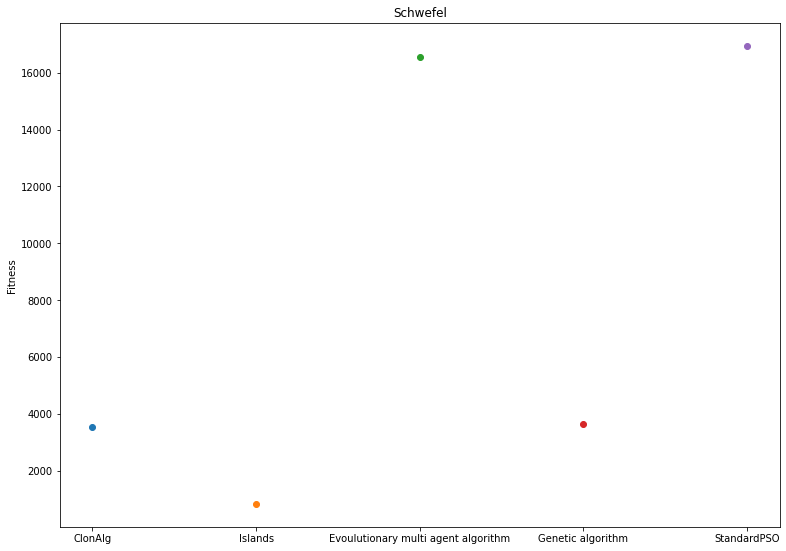

In [18]:
from clonalSelection.clonalg import CloneAlg
from islandModel.model import Islands
from multiAgentSystem.main import Emas
from multiParentCrossover.multiparentcrossover import RandomMultiParentCrossover
from particleSwarmOptimization.ParticleSwarmOptimization import WithNeighborsPSO

from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm
from jmetal.operator.mutation import UniformMutation
from jmetal.operator import BinaryTournamentSelection, PolynomialMutation, SBXCrossover
from jmetal.problem.singleobjective.unconstrained import Rastrigin, Sphere
from jmetal.util.termination_criterion import StoppingByEvaluations
from jmetal.util.archive import CrowdingDistanceArchive

import matplotlib.pyplot as plt 
import numpy as np 


if __name__ == '__main__':

    population_size=100
    offspring_population_size=100
    mutation=PolynomialMutation(1.0 / 50, 20.0)
    crossover=SBXCrossover(0.9, 20.0)
    selection=BinaryTournamentSelection()
    termination_criterion=StoppingByEvaluations(max_evaluations=10000)

    
    problems = [Rastrigin(50), Sphere(50), Schwefel(50)]
    for problem in problems:
        fig = plt.figure(figsize =(10, 7)) 
        testers = [
        CloneAlg(problem, population_size, offspring_population_size, mutation, 0.3, termination_criterion),
        Islands(3, 10, 0.2, True, True, 10000, problem),
        Emas(number_of_islands = 10, init_island_population_size = 20, problem = problem, mutation = mutation, crossover= crossover, termination_criterion= termination_criterion),
        GeneticAlgorithm(problem, population_size, offspring_population_size, mutation, RandomMultiParentCrossover(PN = 5), selection, termination_criterion),
        WithNeighborsPSO(problem, 100, CrowdingDistanceArchive(100), termination_criterion)
        ]
        for test in testers:
            alldata = []
            for x in range(10):
                data = []
                algorithm = test
                algorithm.run()
                if algorithm.get_name() == "Evoulutionary multi agent algorithm": result= min([z.fitness() for x in algorithm.get_result() for z in x])
                elif algorithm.get_name() == "Islands" : result = algorithm.islands[str(0)].get_result().objectives[0]
                else: result = algorithm.get_result().objectives[0]

            # Creating axes instance 
            ax = fig.add_axes([0, 0, 1, 1]) 

            # Creating plot 
            ax.scatter(test.get_name(), result, label = test.get_name())


        ax.set_title(problem.get_name())
        ax.set_ylabel('Fitness') 
        plt.show()
